In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('car_price_dataset.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [14]:
df.isna().sum()

,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


In [15]:
df = pd.get_dummies(df, columns=['Brand', 'Model', 'Fuel_Type', 'Transmission'], drop_first=True)
df.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2012,2.0,5356,2,3,12092,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2020,4.2,231440,4,2,11171,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2023,2.0,160971,2,1,11780,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,2003,2.6,286618,3,3,2867,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [16]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


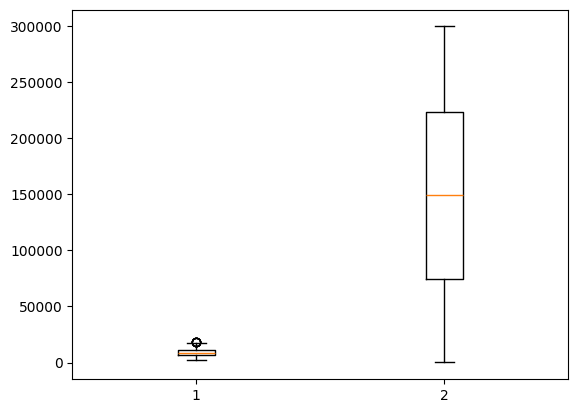

In [17]:
#boxplot or all columns using matplotlib

plt.boxplot(df[['Price' , 'Mileage']])
plt.show()

In [18]:
#removing the high std by using the scaling for all the features
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()
col_names = ['Price' , 'Mileage', 'Year', 'Engine_Size', 'Doors', 'Owner_Count']
features = df_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_scaled[col_names] = features

In [19]:
df_scaled.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,8.074608e-15,2.842171e-16,-1.548983e-16,-1.087130e-16,7.531753e-17,-2.394529e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.673642e+00,-1.740728e+00,-1.728655e+00,-1.348689e+00,-1.399610e+00,-2.201797e+00
25%,-8.037430e-01,-8.706074e-01,-8.641284e-01,-4.478212e-01,-6.966770e-01,-7.090783e-01
50%,6.615581e-02,-4.872673e-04,4.030307e-03,-4.478212e-01,6.256104e-03,1.778540e-03
75%,7.910715e-01,8.696329e-01,8.612150e-01,4.530462e-01,7.091892e-01,7.176154e-01
max,1.660970e+00,1.739753e+00,1.745961e+00,1.353914e+00,1.412122e+00,3.035571e+00


In [20]:
df_scaled.head()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_BMW,Brand_Chevrolet,Brand_Ford,Brand_Honda,...,Model_Sonata,Model_Sportage,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Transmission_Semi-Automatic
0,1.226021,1.043657,1.630075,-0.447821,1.412122,-0.113083,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.066156,-0.870607,-1.666895,-1.348689,0.006256,1.040674,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1.226021,1.043657,0.952303,0.453046,-0.696677,0.744764,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.660970,-0.870607,0.135915,-1.348689,-1.399610,0.940431,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,-1.238692,-0.348535,1.591543,-0.447821,0.006256,-1.923238,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [21]:
#prediction the price using linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_scaled.drop('Price' , axis = 1)
y = df_scaled['Price']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

linear_model = LinearRegression()
linear_model.fit(X_train , y_train)

LinearRegression()

In [22]:
#model accuracy

print(linear_model.score(X_train , y_train))
print(linear_model.score(X_test , y_test))

0.9991722946428154
0.999541357336514


In [23]:
#installing the bcrypt
!pip install bcrypt


In [24]:
import sqlite3
import bcrypt

# Connect to DB (stored temporarily in Colab)
conn = sqlite3.connect("/content/users.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS users (
    username TEXT PRIMARY KEY,
    password_hash BLOB
)
""")
conn.commit()

# Add a user (only once!)
password = "mypassword".encode("utf-8")
hashed = bcrypt.hashpw(password, bcrypt.gensalt())

cursor.execute(
    "INSERT OR IGNORE INTO users (username, password_hash) VALUES (?, ?)",
    ("admin", hashed)
)

conn.commit()
conn.close()

print("User created successfully")


User created successfully


In [25]:
def login(username, password):
    conn = sqlite3.connect("/content/users.db")
    cursor = conn.cursor()
    cursor.execute("SELECT password_hash FROM users WHERE username=?", (username,))
    row = cursor.fetchone()
    conn.close()

    if row and bcrypt.checkpw(password.encode("utf-8"), row[0]):
        return True
    return False

print(login("admin", "mypassword"))
print(login("admin", "wrongpass"))

True
False


In [27]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.6 MB/s eta 0:00:00


In [30]:
!pip install pyngrok
from pyngrok import ngrok

!streamlit run your_script.py &



Usage: streamlit run [OPTIONS] [TARGET] [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: your_script.py


In [31]:
import streamlit as st
st.title("Secure Sales Dashboard")

username = st.text_input("Username")
password = st.text_input("Password", type="password")

if st.button("Login"):
    if login(username, password):
        st.success("Logged in!")
        st.line_chart(df['sales_amount'])
    else:
        st.error("Invalid credentials")

2025-12-24 16:58:33.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-24 16:58:33.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-24 16:58:33.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-24 16:58:33.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-24 16:58:33.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-24 16:58:33.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-24 16:58:33.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-24 16:58:33.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar